# DATA ASSIGNMENT

This assignment was done to explore various methods of modelling a given set of data in order to predict one target variable from a possible set of nine features.  The document was split into the following sections:
1.  Importing libraris and overview of data


## 1.  Importing libraries and overview of data

### 1.1. Importing libraries

In [1]:
####################
## Data handeling ##
####################
import pandas as pd 
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#########################
## General Mathematics ##
#########################
import numpy as np 
from statistics import mode,median,mean

###################
## Visualisation ##
###################
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

##################
## ML Libraries ##
##################

#Gradient Boost
#import xgboost as xgb

#General ML Libraries
import sklearn      
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

### 1.2. Importing data

In [2]:
##################################################
## Import dataset and split into train and test ##
##################################################

File_Import_Name ='C:/Users/Abil083.D_ABSA/Desktop/Ian_Assignment/Blu.csv'

df = pd.read_csv(File_Import_Name)
test_percentage = 0.3
train_data, test_data = train_test_split(df, test_size=test_percentage)
print("The total number of rows in training set is: ",len(train_data), "for a training size of ",test_percentage*100,"%") #916
train_data.head(10)

The total number of rows in training set is:  916 for a training size of  30.0 %


,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
829,0,46.9000,2,5,NaN,blue,16.0,3,sigma,179.900502
476,0,26.0000,1,1,NaN,pink,30.0,2,sigma,176.228109
298,1,28.5375,0,0,cantor-64,pink,31.0,1,gamma,173.190795
609,0,8.0500,0,0,NaN,pink,26.0,3,sigma,45.747515
770,0,7.2500,0,0,NaN,pink,36.0,3,sigma,70.300894
904,0,7.8958,0,0,NaN,pink,23.0,3,sigma,61.324524
1009,0,7.7500,0,0,NaN,pink,NaN,3,qoph,63.844728
688,0,7.0458,0,1,NaN,pink,29.0,3,sigma,94.180957
501,1,19.5000,1,0,NaN,blue,13.0,2,sigma,42.725379
1269,0,9.5000,0,0,NaN,pink,33.0,3,sigma,116.070381


### 1.3. Types of data

In [3]:
train_data.describe()

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9
count,916.000000,915.000000,916.000000,916.000000,738.000000,916.000000,916.000000
mean,0.390830,34.397682,0.387555,0.527293,29.665650,2.293668,102.098802
std,0.488203,55.442309,0.838564,1.098592,14.499838,0.836336,51.212799
min,0.000000,0.000000,0.000000,0.000000,0.166700,1.000000,-93.974333
25%,0.000000,7.925000,0.000000,0.000000,20.250000,2.000000,67.683823
50%,0.000000,14.458300,0.000000,0.000000,28.000000,3.000000,100.853376
75%,1.000000,30.500000,0.000000,1.000000,38.875000,3.000000,136.229619
max,1.000000,512.329200,9.000000,8.000000,80.000000,3.000000,247.341460


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 829 to 1033
Data columns (total 10 columns):
target_var    916 non-null int64
feature_1     915 non-null float64
feature_2     916 non-null int64
feature_3     916 non-null int64
feature_4     199 non-null object
feature_5     916 non-null object
feature_6     738 non-null float64
feature_7     916 non-null int64
feature_8     914 non-null object
feature_9     916 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.7+ KB


From the above information the following may be observed:
    - Feature 1: Integer
    - Feature 2: Float
    - Feature 3: Integer
    - Feature 4: Object
    - Feature 5: Object
    - Feature 6: Flat
    - Feature 7: Integer
    - Feature 8: Object 
    - Feature 9: Float

### 1.4. Data overview

There are a number of aspects to consider when viewing this particular dataset.  The first one is dealing with missing data.

In [5]:
Number_of_Rows = len(df)
Total_Missing_Values = (Number_of_Rows - df.apply(lambda x: x.count(), axis=0))/(Number_of_Rows)*100
print(Total_Missing_Values)

target_var     0.000000
feature_1      0.076394
feature_2      0.000000
feature_3      0.000000
feature_4     77.463713
feature_5      0.000000
feature_6     20.091673
feature_7      0.000000
feature_8      0.152788
feature_9      0.000000
dtype: float64


From the above data the following may be concluded: Five of the 9 features have no missing values, 
two features have less than 1% of their data missing, and 2 features have more than 20% of their
values missing.  When dealing with the missing data, five different approaches will be considered,
as suggested by Kishan Maladkar in an "Analytics India Magaizine" article from February 2018,
namely: deleting the entire row which has missing information; replace the missing data with the
mean/mode/median; assigning a unique category; predicting the missing values; or using algorithms
which support the missing values.  The full overview and application of these methods will be given
in the next section.

In [6]:
df_missing_col = 10-df.apply(lambda x: x.count(), axis=1)
dict(Counter(df_missing_col))

{0: 270, 1: 798, 2: 241}

Another interesting aspect to note is that 270 rows (of the 1310 rows) have no data missing, whereas 798 rows have one value missing and 241 have two values missing.  No row has more than 2 values missing.  798 rows and 270 rows are significant in the context of the total sample, and caution will be applied when considering whether or not to simply ommit the data.    

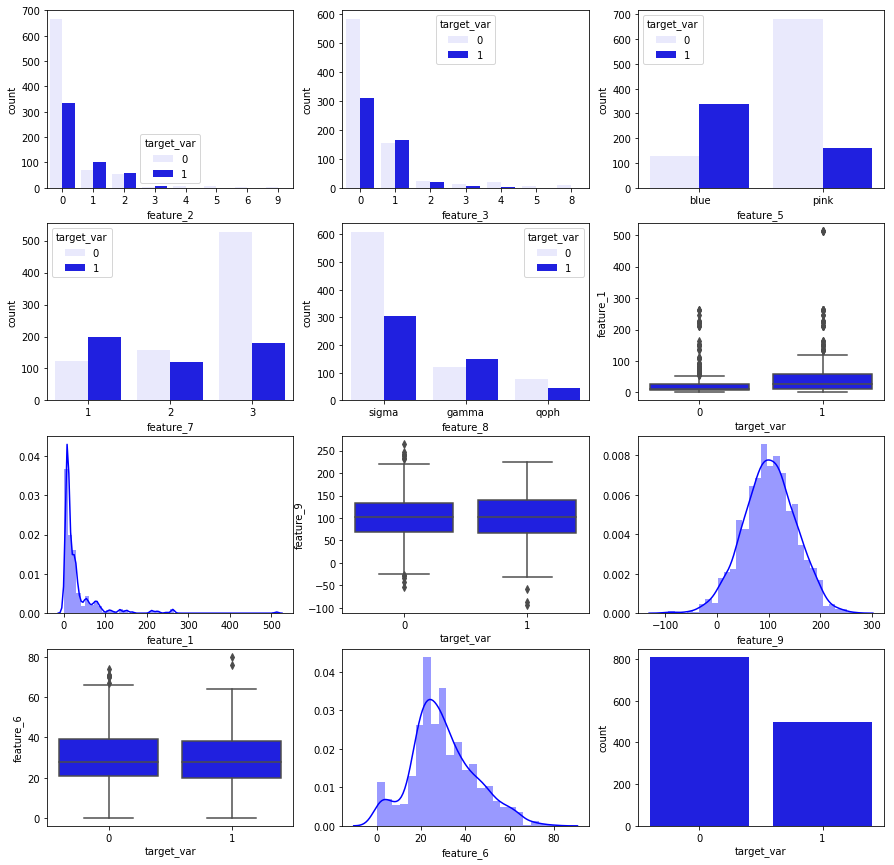

In [7]:
f,ax = plt.subplots(4,3,figsize=(15,15))
sns.countplot('feature_2',hue = 'target_var',data=df,ax=ax[0,0],color = 'b')
sns.countplot('feature_3',hue = 'target_var',data=df,ax=ax[0,1],color = 'b')
sns.countplot('feature_5',hue = 'target_var',data=df,ax=ax[0,2],color = 'b')
sns.countplot('feature_7',hue = 'target_var',data=df,ax=ax[1,0],color = 'b')
sns.countplot('feature_8',hue = 'target_var',data=df,ax=ax[1,1],color = 'b')
sns.boxplot(x='target_var',y='feature_1',data=df,ax=ax[1,2],color = 'b')
sns.distplot(df['feature_1'].dropna(),ax=ax[2,0],color = 'b')
sns.boxplot(x='target_var',y='feature_9',data=df,ax=ax[2,1],color = 'b')
sns.distplot(df['feature_9'].dropna(),ax=ax[2,2],color = 'b')

sns.boxplot(x='target_var',y='feature_6',data=df,ax=ax[3,0],color = 'b')
sns.distplot(df['feature_6'].dropna(),ax=ax[3,1],color = 'b')
sns.countplot('target_var',data=df,ax=ax[3,2],color='b')

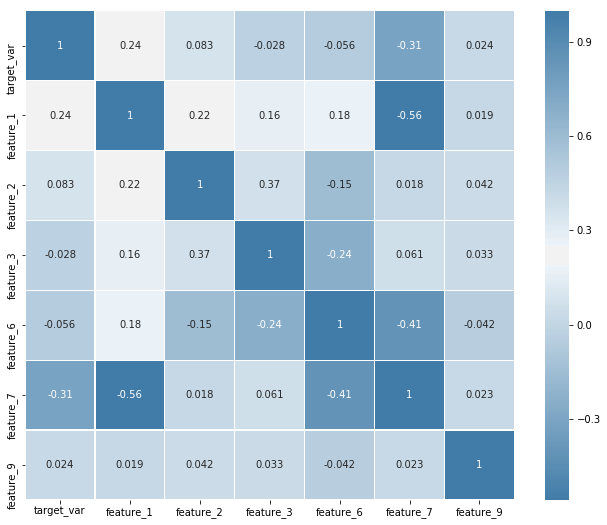

In [8]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 240, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
drop_elements = ['feature_4','feature_5','feature_8']

df_ammend = df.drop(drop_elements, axis = 1)
sns.heatmap(df_ammend.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap,annot=True, linecolor='white')

## 3. Data wrangeling

### 3.1. 'Feature_1' missing data

Method 1: Replace mssing variable with mode/median/mean

In [9]:
df_Mode = mode(df.feature_1)
df_Mean =df.feature_1[~np.isnan(df.feature_1)].mean()
df_Median = median(df.feature_1)
print("Mode: ",df_Mode," ","Mean: ",df_Mean," ","Median: ",df_Median," ")

df_Mean_Change = df['feature_1'].replace(np.NaN, df['feature_1'].mean())
#print(df_Mean_Change)

df = pd.read_csv(File_Import_Name)
df_Median_Change = df['feature_1'].replace(np.NaN, df_Median)
#print(df_Median_Change)

df = pd.read_csv(File_Import_Name)
df_Mode_Change = df['feature_1'].replace(np.NaN, df_Mode)
#print(df_Mode_Change)

df = pd.read_csv(File_Import_Name)

Mode:  8.05   Mean:  33.29547928134572   Median:  16.1  


Method 2: Delete the row with the missing value

In [10]:
NaN_Index = (np.argwhere(np.isnan(df['feature_1'])))
df_Drop_Row = df.drop(df.index[NaN_Index][0])
df_Drop_Row.shape

(1308, 10)

Mehtod 3,4, and 5: Predict the values or assign categories

In this particular case Method 3 will not be considered.  The reason for this is that we are dealing with integers, where either of the two aforementioned methods, or Method 4 should provide greater accuracy.  Due to the complexity of Method 5, it will be assumed that the prediction will provide little to a negligible amount of value.  Method 3 is explored below.  In this method linear regression will be used to predict the missing values.

### 3.2. 'Feature_4' missing data

This is a particularly interesting feature since it contains both text and numerical values.  Also 77% of its values are blank.  The big questions therefore are: Should the entire feature be ommitted?  If not ommitted, how can the issue of blank values be addressed?



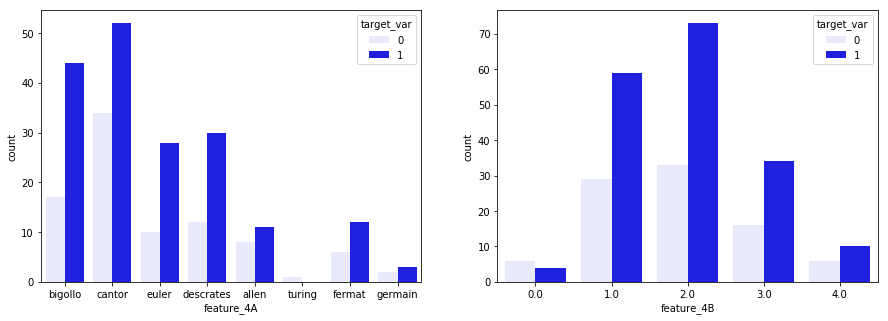

In [11]:
df = pd.read_csv(File_Import_Name)
df_feature_4_Pre = df.dropna()
df_feature_4_Pre.reset_index(drop=True,inplace=True)
df_feature_4_Pre.head(30)
df_feature_4 = pd.DataFrame(df_feature_4_Pre.feature_4.str.split('-',1).tolist(),columns = ['feature_4A','feature_4B'])
df_feature_4_combine = pd.concat([df_feature_4_Pre, df_feature_4], axis=1)
df_feature_4_combine
df_feature_4_whole = df_feature_4_combine.convert_objects(convert_numeric=True)

df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>=1) & (df_feature_4_whole['feature_4B']<=40),'feature_4B']= 1
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>40) & (df_feature_4_whole['feature_4B']<=80),'feature_4B']= 2
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>80) & (df_feature_4_whole['feature_4B']<=120),'feature_4B']= 3
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>120) & (df_feature_4_whole['feature_4B']<=180),'feature_4B']= 4
df_feature_4B = df_feature_4_whole.feature_4B.fillna(0)
df_feature_4_whole.feature_4B = df_feature_4B

f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot('feature_4A',hue = 'target_var',data=df_feature_4_whole,ax=ax[0],color = 'b')
sns.countplot('feature_4B',hue = 'target_var',data=df_feature_4_whole,ax=ax[1],color = 'b')




In [12]:
df_feature_4_whole

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_4A,feature_4B
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877942,bigollo,1.0
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423,cantor,1.0
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103,cantor,1.0
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352,cantor,1.0
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716,cantor,1.0
5,1,26.5500,0,0,euler-23,pink,48.0000,1,sigma,75.970582,euler,1.0
6,1,77.9583,0,1,descrates-18,blue,63.0000,1,sigma,125.853521,descrates,1.0
7,0,0.0000,0,0,allen-47,pink,39.0000,1,sigma,103.637401,allen,2.0
8,1,51.4792,0,2,cantor-112,blue,53.0000,1,sigma,94.425637,cantor,3.0
9,0,227.5250,0,1,cantor-73,pink,47.0000,1,gamma,125.172256,cantor,2.0


In [13]:
for i in range(1,5):
    Total = (df_feature_4_whole[(df_feature_4_whole.feature_4B == i)].sum()[11])/i
    Section = df_feature_4_whole[(df_feature_4_whole.feature_4B == i) & (df_feature_4_whole.target_var == 1)].sum()[0]
    Relation = (Section / Total)*100
    print(i,": ",Relation,"%")

1 :  67.04545454545455 %
2 :  68.86792452830188 %
3 :  68.0 %
4 :  62.5 %


In [14]:
Word_cat = ["allen","bigollo", "cantor", "descrates","euler","fermat","germain","turing"]
for x in Word_cat:
    Total = df_feature_4_whole.feature_4A.str.count(x).sum()
    Section = df_feature_4_whole[(df_feature_4_whole.feature_4A ==x) & (df_feature_4_whole.target_var == 1)].sum()[0]
    Relation = (Section / Total)*100
    print(x,": ", Relation,"%")

allen :  57.89473684210527 %
bigollo :  72.1311475409836 %
cantor :  60.46511627906976 %
descrates :  71.42857142857143 %
euler :  73.68421052631578 %
fermat :  66.66666666666666 %
germain :  60.0 %
turing :  0.0 %


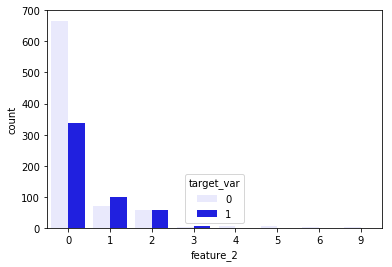

In [15]:
sns.countplot('feature_2',hue = 'target_var',data=df,color = 'b')

134.0
226.0
249.0
210.0
227.0


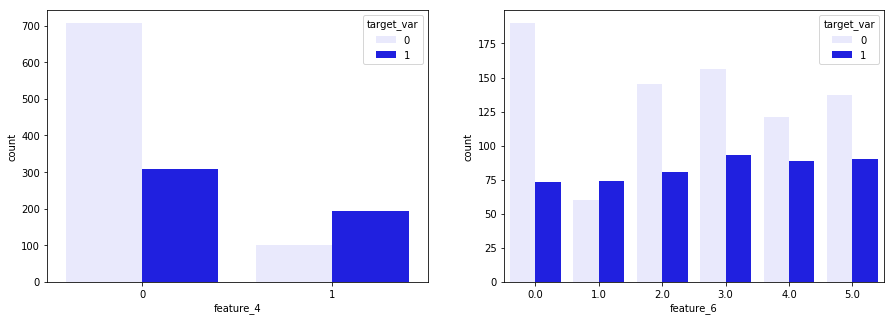

In [16]:
df = pd.read_csv(File_Import_Name)
df.feature_1 = df_Mean_Change
df_f4= df.feature_4.fillna(0)
df.feature_4 = df_f4
df_Whole = df
for x in range(0,1309):
 if df_Whole.feature_4[x]!=0:
    df_Whole.feature_4[x] = 1
    
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot('feature_4',hue = 'target_var',ax=ax[0],data=df_Whole,color = 'b')

A = df_Whole.feature_6.fillna(0)
A.loc[(A>0.1) & (A<=16)] = 1
A.loc[(A>16) & (A<=23)] = 2
A.loc[(A>23) & (A<=30)] = 3
A.loc[(A>30) & (A<=40)] = 4
A.loc[(A>40)] = 5

df_Whole.feature_6 = A
df_Whole_Update =df_Whole
df_Whole_Update


for i in range(1,6):
    Section = df_Whole_Update[(df_Whole_Update.feature_6 ==i)].sum()[6]/i
    print(Section)

sns.countplot('feature_6',hue = 'target_var',ax=ax[1],data=df_Whole_Update,color = 'b')

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
5       3.0
6       3.0
7       1.0
8       3.0
9       3.0
10      3.0
11      3.0
12      3.0
13      3.0
14      3.0
15      3.0
16      3.0
17      3.0
18      3.0
19      3.0
20      3.0
21      3.0
22      3.0
23      3.0
24      3.0
25      3.0
26      3.0
27      3.0
28      3.0
29      3.0
       ... 
1279    1.0
1280    1.0
1281    1.0
1282    1.0
1283    1.0
1284    1.0
1285    2.0
1286    1.0
1287    1.0
1288    1.0
1289    1.0
1290    1.0
1291    1.0
1292    1.0
1293    1.0
1294    2.0
1295    1.0
1296    1.0
1297    1.0
1298    2.0
1299    2.0
1300    2.0
1301    1.0
1302    1.0
1303    2.0
1304    2.0
1305    2.0
1306    1.0
1307    1.0
1308    1.0
Name: feature_1, Length: 1309, dtype: float64
461.0
360.0
488.0


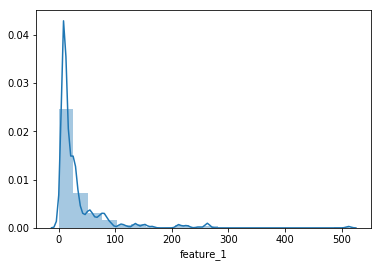

In [17]:
sns.distplot(df_Whole_Update.feature_1,hist=True,bins=20)
B = df_Mean_Change

B.loc[(B>=0) & (B<=9)] = 1
B.loc[(B>9) & (B<=25)] = 2
B.loc[(B>25)] = 3

print(B)
df_Whole_Update.feature_1 = B

for i in range(1,4):
    Section = df_Whole_Update[(df_Whole_Update.feature_1 ==i)].sum()[1]/i
    print(Section)

In [18]:
C = df_Whole_Update.feature_5
C.loc[(C=="pink")] = 1
C.loc[(C=="blue")] = 2


df_Whole_Update.feature_5 = C
df_Whole_Update

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,3.0,0,0,1,2,3.0,1,sigma,112.877942
1,1,3.0,2,1,1,1,1.0,1,sigma,60.291423
2,0,3.0,2,1,1,2,1.0,1,sigma,143.794103
3,0,3.0,2,1,1,1,3.0,1,sigma,131.278352
4,0,3.0,2,1,1,2,3.0,1,sigma,204.415716
5,1,3.0,0,0,1,1,5.0,1,sigma,75.970582
6,1,3.0,0,1,1,2,5.0,1,sigma,125.853521
7,0,1.0,0,0,1,1,4.0,1,sigma,103.637401
8,1,3.0,0,2,1,2,5.0,1,sigma,94.425637
9,0,3.0,0,0,0,1,5.0,1,gamma,85.687636


In [28]:
df_Whole_Update

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,3.0,0,0,1,2,3.0,1,1
1,1,3.0,2,1,1,1,1.0,1,1
2,0,3.0,2,1,1,2,1.0,1,1
3,0,3.0,2,1,1,1,3.0,1,1
4,0,3.0,2,1,1,2,3.0,1,1
5,1,3.0,0,0,1,1,5.0,1,1
6,1,3.0,0,1,1,2,5.0,1,1
7,0,1.0,0,0,1,1,4.0,1,1
8,1,3.0,0,2,1,2,5.0,1,1
9,0,3.0,0,0,0,1,5.0,1,2


In [29]:
df_Whole_Update = df_Whole_Update.drop('feature_9',axis=1)
df_Whole_Update

ValueError: labels ['feature_9'] not contained in axis

In [33]:
test_percentage = 0.3
train_data, test_data = train_test_split(df_Whole_Update, test_size=test_percentage)
train_data.head(10)

X_train = train_data.drop("target_var", axis=1)
Y_train = train_data["target_var"]

from sklearn.cross_validation import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

X_train.feature_8.isnull().sum().sum()
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log



C:\Users\Abil083.D_ABSA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


77.45